In [36]:
import numpy as np

In [37]:
from scipy.optimize import*

In [38]:
from scipy.linalg import*
from pylab import*
import matplotlib.pyplot as plt

In [39]:
x = fromfile('x_data12.txt',float,sep='\n')
y = fromfile('y_data12.txt',float,sep='\n')

In [40]:
def f1(x,a,x0,x1):
    return a*exp(-(x-x0)**(2/(2*x1**2)))

In [41]:
def f2(x,a,b):
    return a*x+b

# функция f1

In [50]:
beta_opt,beta_cov = curve_fit(f1,x,y)
print (beta_opt)

[ 0.99356735  0.99108376  2.25893336]


/Users/myomaung/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


In [43]:
lin_dev = sum(beta_cov[0])
print (lin_dev)

-0.00252227635912


In [44]:
residuals = y - f1(x,*beta_opt)
fres = sum(residuals**2)
print (fres)

0.151745566891


# функция f2

In [45]:
beta_opt2,beta_cov2 = curve_fit(f2,x,y)
print (beta_opt2)

[-0.01934722  0.39427139]


In [46]:
lin_dev2 = sum(beta_cov2[0])
print (lin_dev2)

-7.73495332938e-05


In [47]:
residuals2 = y - f2(x,*beta_opt2)
fres2 = sum(residuals2**2)
print (fres2)

0.322026625897


# рисуем график

In [48]:
%matplotlib inline
xx = np.linspace(x.min(),x.max(),100)

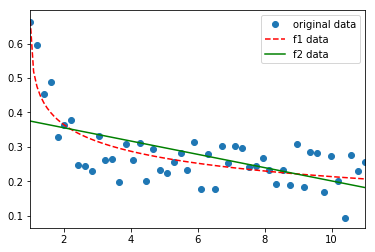

In [49]:
plt.plot(x,y,'o',label="original data")
plt.plot(xx,f1(xx,*beta_opt),'r--',label="f1 data")
plt.plot(xx,f2(xx,*beta_opt2),'g',label="f2 data")
plt.legend()
plt.xlim(x.min(),x.max())
plt.show()